In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
import json
from webdriver_manager.chrome import ChromeDriverManager
from pandas.io.json import json_normalize
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas import json_normalize


from adjustText import adjust_text
from matplotlib import cm
import matplotlib.patheffects as path_effects

In [3]:
driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get('https://www.whoscored.com/Matches/1485229/Live/England-Premier-League-2020-2021-Manchester-City-Arsenal')
data = driver.execute_script("return matchCentreData;")

with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)
       
driver.close()

[WDM] - Current google-chrome version is 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240
[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/86.0.4240.22/chromedriver_mac64.zip


[WDM] - Driver has been saved in cache [/Users/ollinj01/.wdm/drivers/chromedriver/mac64/86.0.4240.22]


In [4]:
pwd

'/Users/ollinj01/Football Analytics/who-scored/Sheff Utd_Leeds'

In [5]:
home_team, away_team = data["home"]["name"], data["away"]["name"]
with open(f"{home_team}_{away_team}.json", "w") as f: ## save as Arsenal_Liverpool.json in present directory
    json.dump(data, f, indent=4)

In [6]:
class Player:

    def __init__(self, name, pid, x, y, total):
        self.name = name
        self.pid = pid
        self.x = x
        self.y = y
        self.total = total

In [7]:
def get_receiver(df):
    """ Get the receiver for successful open-play passes"""

    df[["receiver_id", "receiver_team_id"]] = df[["playerId", "teamId"]].shift(-1)
    df = df.query("(outcomeType_value == 1) & (type_displayName == 'Pass') & (receiver_team_id == teamId)").reset_index(drop=True)
    df.dropna(subset=["playerId", "receiver_id", "teamId", "receiver_team_id"], inplace=True)
    df[["playerId", "receiver_id", "teamId", "receiver_team_id"]] = df[["playerId", "receiver_id", "teamId", "receiver_team_id"]].astype(int)
    return df

In [10]:
with open(r"Man City_Arsenal.json") as f:
    md = json.load(f)

In [11]:
side = "home" if md["home"]["name"] == "Arsenal" else "away"  
team_id = md[side]["teamId"]  
st_players = {} ##get the starting 11 players
for player in md[side]["players"]:
        if "isFirstEleven" in player:
            st_players.update({player["playerId"]: player["name"]})        


In [12]:
df = json_normalize(md["events"], sep="_")

In [13]:
df

,eventId,expandedMinute,id,isTouch,minute,qualifiers,satisfiedEventsTypes,second,teamId,x,...,minuteInfo_expandedMinute,minuteInfo_extraTime,minuteInfo_isEndOfPeriod,minuteInfo_minute,minuteInfo_minuteString,minuteInfo_period,type_$idx,type_$len,cardType_$idx,cardType_$len
0,2,0,2222637269,False,0,[],[],0.0,13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,2222637271,False,0,[],[],0.0,167,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,2222637309,True,0,"[{'type': {'displayName': 'Angle', 'value': 21...","[90, 116, 29, 34, 36, 215, 217]",1.0,13,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,2222637327,True,0,"[{'type': {'displayName': 'Zone', 'value': 56}...","[90, 119, 123, 127, 35, 37, 216, 217]",2.0,13,45.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,0,2222637339,True,0,"[{'type': {'displayName': 'Angle', 'value': 21...","[90, 116, 29, 138, 35, 37, 214, 217]",4.0,167,24.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,988,96,2222734129,False,94,[],[],6.0,167,0.0,...,96.0,4.0,True,94,90+4,2,NaN,NaN,NaN,NaN
1665,785,6,2222734239,False,0,[],[],0.0,13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1666,989,6,2222735739,False,0,[],[],0.0,167,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1667,1,0,2222573237,False,0,"[{'type': {'displayName': 'InvolvedPlayers', '...",[],0.0,167,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
pdf = get_receiver(df)

In [15]:
pdf

,eventId,expandedMinute,id,isTouch,minute,qualifiers,satisfiedEventsTypes,second,teamId,x,...,minuteInfo_isEndOfPeriod,minuteInfo_minute,minuteInfo_minuteString,minuteInfo_period,type_$idx,type_$len,cardType_$idx,cardType_$len,receiver_id,receiver_team_id
0,3,0,2222637309,True,0,"[{'type': {'displayName': 'Angle', 'value': 21...","[90, 116, 29, 34, 36, 215, 217]",1.0,13,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144890,13
1,3,0,2222637339,True,0,"[{'type': {'displayName': 'Angle', 'value': 21...","[90, 116, 29, 138, 35, 37, 214, 217]",4.0,167,24.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331254,167
2,5,0,2222637379,True,0,"[{'type': {'displayName': 'Length', 'value': 2...","[90, 116, 29, 34, 37, 214, 217]",7.0,167,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313171,167
3,6,0,2222637413,True,0,"[{'type': {'displayName': 'Zone', 'value': 56}...","[90, 116, 29, 34, 37, 214, 217]",9.0,167,12.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121774,167
4,7,0,2222637445,True,0,"[{'type': {'displayName': 'Length', 'value': 2...","[90, 116, 29, 35, 37, 214, 217]",10.0,167,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303139,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,979,95,2222733567,True,93,"[{'type': {'displayName': 'Length', 'value': 2...","[90, 116, 29, 35, 36, 215, 217]",18.0,167,29.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104749,167
998,980,95,2222733595,True,93,"[{'type': {'displayName': 'Length', 'value': 2...","[90, 116, 29, 34, 36, 215, 217]",19.0,167,43.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136741,167
999,984,95,2222733999,True,93,"[{'type': {'displayName': 'PassEndY', 'value':...","[90, 118, 116, 29, 131, 204, 35, 37, 216, 217]",55.0,167,69.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104749,167
1000,985,95,2222734017,True,93,"[{'type': {'displayName': 'PassEndY', 'value':...","[90, 118, 116, 29, 34, 36, 215, 217]",56.0,167,75.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128967,167


In [16]:
pdf = pdf[pdf["qualifiers"].apply(lambda x:x not in ["Freekick", "GoalKick", "Corner"])] ##remove set-pieces

In [17]:
pdf = pdf.dropna(axis=1, how="all")

In [18]:
group1 = pdf.groupby(["playerId", "receiver_id"]).agg(count=("teamId", "size")).reset_index()

In [19]:
group1 = group1.loc[group1["count"]>1]

In [20]:
group1["count"] = group1["count"]/group1["count"].max()

In [21]:
group2 = pdf.groupby(["playerId"]).agg(x=("x", "mean"), y=("y", "mean"), total=("teamId", "size")).reset_index()

In [22]:
group2['x_loc_m'] = group2['x'] / 100 * 104
group2['y_loc_m'] = group2['y'] / 100 * 68

In [23]:
group2['y1'] = [68 - i for i in group2['y_loc_m']] # Note y axis is flipped for vertical pitch view

In [24]:
stplist = list(st_players.keys()) ##list of starting players ids

In [25]:
group1 = group1.query("(playerId in @stplist) & (receiver_id in @stplist)").reset_index(drop=True)

In [26]:
group2 = group2.query("playerId in @stplist").reset_index(drop=True)

In [27]:
group2["player_name"] = group2["playerId"].map(st_players)

In [28]:
%matplotlib inline

In [29]:
plr_objs = {}
for i in group2.index:
    plr_objs[group2.loc[i, "playerId"]] = Player(group2.loc[i, "player_name"], group2.loc[i, "playerId"], group2.loc[i, "y1"], group2.loc[i, "x_loc_m"], group2.loc[i, "total"])

In [30]:
group2

,playerId,x,y,total,x_loc_m,y_loc_m,y1,player_name
0,27586,27.375000,26.055769,52,28.470000,17.717923,50.282077,David Luiz
1,29463,58.200000,36.469565,23,60.528000,24.799304,43.200696,Willian
2,44120,67.341667,82.208333,12,70.035333,55.901667,12.098333,Pierre-Emerick Aubameyang
3,89401,43.786486,55.813514,37,45.537946,37.953189,30.046811,Granit Xhaka
4,92173,12.034091,50.709091,44,12.515455,34.482182,33.517818,Bernd Leno
5,125211,45.541176,14.505882,34,47.362824,9.864000,58.136000,Héctor Bellerín
6,144890,47.237209,51.846512,43,49.126698,35.255628,32.744372,Dani Ceballos
7,239872,53.357143,12.000000,7,55.491429,8.160000,59.840000,Nicolas Pépé
8,297403,41.641304,87.728261,46,43.306957,59.655217,8.344783,Kieran Tierney
9,334087,28.124194,69.700000,62,29.249161,47.396000,20.604000,Gabriel Magalhães


In [31]:
import matplotlib.colors

In [32]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [33]:
cmap = ListedColormap(["white","gainsboro","lightgrey","silver","darkgray","gray","dimgray"])

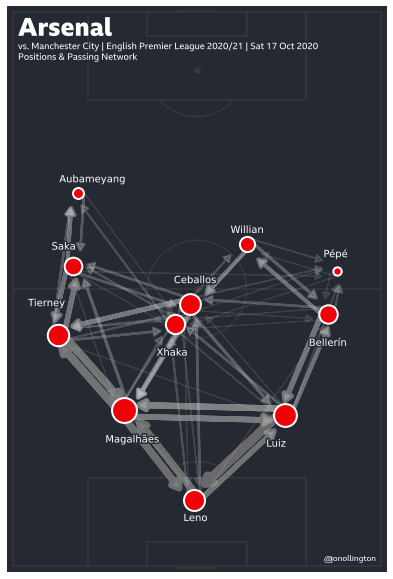

In [56]:
draw_pitch(pitch ='#252932', line ='#383838',orientation='vertical', view='full')

csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}

offset = 1.1 ##change the x and y coordinates of passes between two same players so that there's no overlap

# cmap = cm.get_cmap("Greys")
cmap = ListedColormap(["white","gainsboro","lightgrey","silver","darkgray","gray","dimgray"])

shrink_val = 5 ##Units by which the arrow is shortened from the end_points

style="Simple,tail_width=0.001,head_width=0.8,head_length=0.7"

plr_objs = {}
for i in group2.index:
    plr_objs[group2.loc[i, "playerId"]] = Player(group2.loc[i, "player_name"], group2.loc[i, "playerId"], group2.loc[i, "y1"], group2.loc[i, "x_loc_m"], group2.loc[i, "total"])

for (_, (pid, rid, count)) in group1.iterrows():
    if abs(plr_objs[rid].x - plr_objs[pid].x) > abs(plr_objs[rid].y - plr_objs[pid].y):
        if rid > pid:
            plt.annotate("", xy=(plr_objs[rid].x, plr_objs[rid].y + offset), xytext=(plr_objs[pid].x, plr_objs[pid].y + offset),
                arrowprops={"arrowstyle":style, "connectionstyle":"arc3", "lw":count*9,"color":cmap(count), "alpha":count, "linestyle":"solid", "shrinkB":15},zorder=9)
        elif pid > rid:
            plt.annotate("", xy=(plr_objs[rid].x, plr_objs[rid].y - offset), xytext=(plr_objs[pid].x, plr_objs[pid].y - offset),
                arrowprops={"arrowstyle":style, "connectionstyle":"arc3", "lw":count*9,"color":cmap(count), "alpha":count, "linestyle":"solid", "shrinkB":15},zorder=9)
    
    elif abs(plr_objs[rid].x - plr_objs[pid].x) <= abs(plr_objs[rid].y - plr_objs[pid].y):
        if rid > pid:
            plt.annotate("", xy=(plr_objs[rid].x + offset, plr_objs[rid].y), xytext=(plr_objs[pid].x + offset, plr_objs[pid].y),
                arrowprops={"arrowstyle":style, "connectionstyle":"arc3", "lw":count*9, "color":cmap(count),"alpha":count, "linestyle":"solid", "shrinkB":15},zorder=9)
        elif pid > rid:
            plt.annotate("", xy=(plr_objs[rid].x - offset, plr_objs[rid].y), xytext=(plr_objs[pid].x - offset, plr_objs[pid].y),
                arrowprops={"arrowstyle":style, "connectionstyle":"arc3", "lw":count*9, "color":cmap(count),"alpha":count, "linestyle":"solid", "shrinkB":15},zorder=9)

texts = []        
for player_id, player_obj in plr_objs.items():
    plt.scatter(player_obj.x, player_obj.y, s=player_obj.total*10, color="#EF0107", ec="white", lw="2",alpha=1, zorder=10)
    if player_obj.name == "Nicolas Pépé":
        t1 = plt.text(player_obj.x-2.5,player_obj.y+2.5,color="white", s=player_obj.name.split(" ")[-1], fontsize=10, rotation=0, zorder=12)
        t1.set_path_effects([path_effects.withStroke(linewidth=3,foreground="#252932")])
    elif player_obj.name == "Pierre-Emerick Aubameyang":
        t2 = plt.text(player_obj.x-3.5,player_obj.y+2,color="white", s=player_obj.name.split(" ")[-1], fontsize=10, rotation=0, zorder=12)
        t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground="#252932")])
    elif player_obj.name == "Kieran Tierney":
        t2 = plt.text(player_obj.x-5.5,player_obj.y+5.5,color="white", s=player_obj.name.split(" ")[-1], fontsize=10, rotation=0, zorder=12)
        t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground="#252932")])
    elif player_obj.name == "Willian":
        t2 = plt.text(player_obj.x-3,player_obj.y+2,color="white", s=player_obj.name.split(" ")[-1], fontsize=10, rotation=0, zorder=12)
        t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground="#252932")])
    elif player_obj.name == "Bukayo Saka":
        t2 = plt.text(player_obj.x-4,player_obj.y+3,color="white", s=player_obj.name.split(" ")[-1], fontsize=10, rotation=0, zorder=12)
        t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground="#252932")])
    elif player_obj.name == "Dani Ceballos":
        t2 = plt.text(player_obj.x-3,player_obj.y+4,color="white", s=player_obj.name.split(" ")[-1], fontsize=10, rotation=0, zorder=12)
        t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground="#252932")])
    elif player_obj.name == "Bernd Leno":
        t2 = plt.text(player_obj.x-2,player_obj.y-4,color="white", s=player_obj.name.split(" ")[-1], fontsize=10, rotation=0, zorder=12)
        t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground="#252932")])
    else:
        t = plt.text(player_obj.x-3.5, player_obj.y-6,color="white", s=player_obj.name.split(" ")[-1], fontsize=10, rotation=0, zorder=12)
        t.set_path_effects([path_effects.withStroke(linewidth=3,foreground="#252932")])
    
    
#title
title = plt.text(1,99.5, "Arsenal", color='white',fontsize=25, fontweight='bold', **csfont,zorder=20)
title.set_path_effects([path_effects.withStroke(linewidth=3,foreground="#252932")])
subtitle_string = 'vs. Manchester City | English Premier League 2020/21 | Sat 17 Oct 2020'
subtitle_string2 = 'Positions & Passing Network'
subtitle = plt.text(1, 97, subtitle_string, fontsize=9,**csfont, color='white',zorder=20)
subtitle.set_path_effects([path_effects.withStroke(linewidth=3,foreground="#252932")])
subtitle2 = plt.text(1, 95, subtitle_string2, fontsize=9,**csfont, color='white',zorder=20)
subtitle2.set_path_effects([path_effects.withStroke(linewidth=3,foreground="#252932")])

info_string = '@jonollington'
plt.text(57.3, 0.8, info_string, color='white', ha='left', va='bottom', fontsize=8, **csfont)

plt.rcParams['axes.facecolor']='#252932'
plt.rcParams['savefig.facecolor']='#252932'

plt.savefig("Arsenal_City",bbox_inches="tight",dpi=200)

In [35]:
def draw_pitch(pitch, line, orientation, view):
     
    orientation = orientation
    view = view
    line = line
    pitch = pitch
     
    if orientation.lower().startswith("h"):
         
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        elif view.lower().startswith("t"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(69,105)
            plt.ylim(-1,69)
            # final third line
            lxt = [0,68] 
            lyt = [69,69]
            plt.plot(lxt,lyt,color=line,linestyle='--',zorder=5)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
     
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]
 
        plt.plot(lx1,ly1,color=line,zorder=5)
 
 
        # boxes, 6 yard box and goals
 
            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)
 
        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)
 
            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)
 
        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)
 
 
           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)
 
        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)
 
        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)
 
 
        plt.scatter(93,34,color=line,zorder=5)
        plt.scatter(11,34,color=line,zorder=5)
        plt.scatter(52,34,color=line,zorder=5)
 
        circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
 
        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch, zorder=1,alpha=1)
 
        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color=pitch, zorder=1,alpha=1)
 
        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
         
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        elif view.lower().startswith("t"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(69,105)
            plt.xlim(-1,69)
            # final third line
            lxt = [0,68] 
            lyt = [69,69]
            plt.plot(lxt,lyt,color=line,linestyle='--',zorder=5)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks
 
        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]
 
        plt.plot(lx1,ly1,color=line,zorder=5)
 
 
        # boxes, 6 yard box and goals
 
            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)
 
        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)
 
            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)
 
        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)
 
 
           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)
 
        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)
 
        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)
 
 
        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)
 
        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
 
 
        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
 
        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)
 
        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        return

In [36]:
from PIL import Image

In [37]:
img = Image.open('./arsenal.png')
img.size

(411, 481)

In [38]:
img = img.resize((144, 168), Image.ANTIALIAS)